# Basis functions and scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Load data

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [3]:
X = dat.iloc[:, 1:218].to_numpy()
y = dat['y'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

In [5]:
aq_rf = ensemble.RandomForestRegressor()

In [6]:
aq_rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_test2 = y_test.reshape(1, -1)

In [8]:
y_test_pred = aq_rf.predict(X_test)

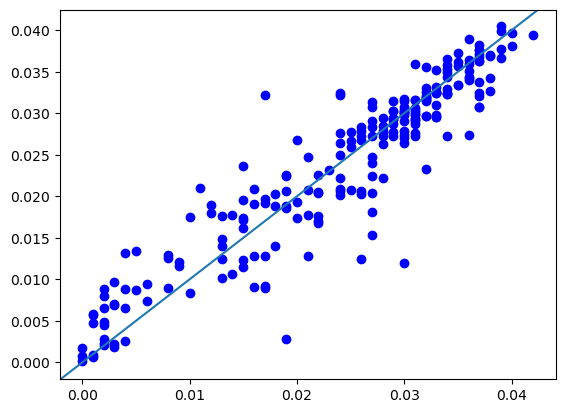

In [9]:
plt.plot(y_test, y_test_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()

In [10]:
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

MAE: 0.0029
MSE: 0.0000


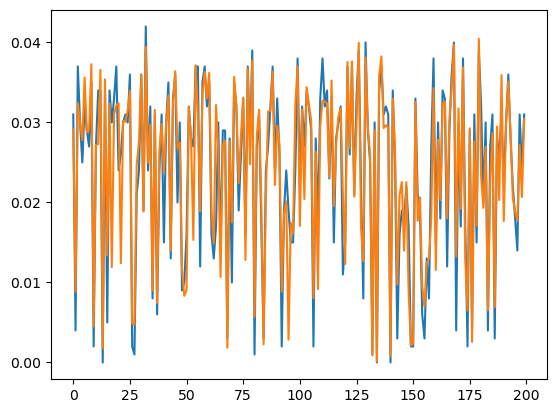

In [11]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

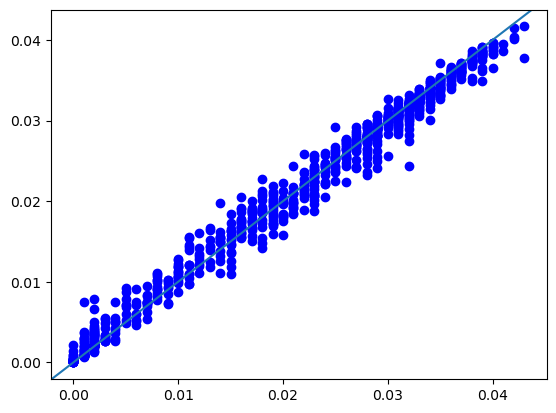

In [12]:
y_train_pred = aq_rf.predict(X_train)
plt.plot(y_train, y_train_pred, 'bo')
plt.axline((0,0), slope=1)
plt.show()